# Simple Linear Regression

In this notebook are some exercises to gain more experience with the material presented in Lecture 3:  Simple Linear Regression.

These problems provide some practice fitting models, and provide a stronger theoretical understanding of the technique as well.

In [1]:
## import the packages we'll use
## For data handling
import pandas as pd
import numpy as np
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Theoretical Questions

<b>Note: These questions cover some of the more theoretical concepts behind the algorithms/models we cover in the lecture videos/problem sessions. Sometimes these theoretical questions will require some knowledge of mathematics/statistics. If you approach a problem and you don't think that you have that knowledge yet, that's okay! You can always come back to that question at a later time :)</b>

##### 1. Deriving the Standard Error for $E(y|x=x^*)$

Use what we learned in [MLE_simple_linear_regression](../../week_02_data-collection/math_hour_2/MLE_simple_linear_regression.ipynb) to find the standard error of $E(y|x=x^*)$.

Recall that we established the following facts about linear regression:

- $\hat{\beta_1} = \frac{\sum_{i=1}^n \left( x_i - \overline{x} \right)\left( y_i - \overline{y} \right)}{\sum_{i=1}^n \left( x_i - \overline{x} \right)^2}$ 

- $\hat{\beta_0} = \overline{y} - \hat{\beta_1} \overline{x}$

- $\text{Var}(\hat{\beta_1}) = \frac{\sigma^2}{\sum_{i=1}^n \left( x_i - \overline{x} \right)^2}$

- $\text{Var}(\hat{\beta_0}) = \frac{\sigma^2}{n} + \overline{x}^2 \text{Var}(\hat{\beta_1})$ 

##### ANSWER

Recall that:

$$
E(y|x=x^*) = \hat{\beta_0} + \hat{\beta_1} x^*, \text{so}
$$

$$
\text{Var}\left(E(y|x=x^*)\right) = \text{Var}\left( \hat{\beta_0} + \hat{\beta_1} x^* \right) = \text{Var}\left( \overline{y} - \overline{x} \hat{\beta_1} + \hat{\beta_1} x^* \right) = \frac{\sigma^2}{n} + \left(x^* - \overline{x} \right)^2 \text{Var}\left( \hat{\beta_1} \right)
$$

$$
= \sigma^2 \left[ \frac{1}{n} + \frac{\left(x^* - \overline{x}\right)^2}{\sum_{i=1}^n \left(x_i - \overline{x}\right)^2} \right]
$$

To get to the final step we can recall that the estimator for $\hat{\sigma^2} = \frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}$ and $s_x^2 = \hat{\sigma^2_x} =   \frac{\sum_{i=1}^n \left( x_i - \overline{x} \right)^2}{n-1}$.

##### Application of previous answer: Confidence Interval for the Regression Line

Let's take a look back at the model we're fitting:
$$
y = f(x) + \epsilon = \beta_0 + \beta_1x + \epsilon,
$$
where $\epsilon$ is a vector of independent $\epsilon_i \sim N(0,\sigma^2)$ for all $i$.

Now take the expectation on both sides:
$$
E(y) = E(\beta_0 + \beta_1x + \epsilon) = \beta_0 + \beta_1E(x) + E(\epsilon) = \beta_0 + \beta_1E(x),
$$
this is where we got the formula for $\hat{\beta_0}$. 

Now let's say we know the value of $x$ for example $x^*$, in probability terms we're now looking at $y$ conditional on $X=x^*$ (denoted $y|x=x^*$), and then take the expectation:
$$
E(y|x=x^*) =  \beta_0 + \beta_1E(x^*) = \beta_0 + \beta_1 x^*,
$$
because we are looking at a specific value of $X$ so it is no longer random. 

So the regression line we've been plotting is actually a series of point estimates for the mean value of $y$ given a specific value of $x$. We've been denoting these point estimates as $\hat{y}$. 

Just like we gave a confidence interval for $\beta_1$ using our point estimate $\hat{\beta_1}$ we can give a confidence interval for $y|x$ using our point estimate $\hat{y}$. The formula for the confidence interval for $E(y|x=x^*)$ is:
$$
\hat{y} \pm t_{n-2,(1-\alpha/2)}\sqrt{\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}}\sqrt{\frac{1}{n} + \frac{\left(x^* - \overline{x}\right)^2}{(n-1)s_x^2}} \approx \hat{y} \pm t_{n-2,(1-\alpha/2)}\sqrt{MSE}\sqrt{\frac{1}{n} + \frac{\left(x^* - \overline{x}\right)^2}{(n-1)s_x^2}},
$$
where $n$ is the number of observations and $t_{n-2,(1-\alpha/2)}$ is such that $P(T\geq t_{n-2,(1-\alpha/2)}) = \alpha/2$ for a random variable $T$ with a Studentized $t$ distribution with $n-2$ degrees of freedom. This formula still follows the confidence interval pattern, where here the product of the square roots is the standard error of $E(y|x=x^*)$.

##### 4. Prediction Intervals for SLR

Recall our discussion on confidence intervals for $E(y|x=x^*)$.

In addition to a confidence interval for the conditional mean, you can also produce what are known as prediction intervals for $y|x=x^*$, which give us a sense of what reasonable lower and upper bounds are for $y|x=x^*$ for a given confidence level, $1-\alpha$.

Recall that the $(1-\alpha)$ confidence interval formula for $E(y|x=x^*)$ was given by:
$$
\hat{y} \pm t_{n-2,(1-\alpha/2)}\sqrt{\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}}\sqrt{\frac{1}{n} + \frac{\left(x^* - \overline{x}\right)^2}{(n-1)s_x^2}},
$$

The formula for the $(1-\alpha)$ prediction interval is quite similar:
$$
\hat{y} \pm t_{n-2,(1-\alpha/2)}\sqrt{\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}}\sqrt{1 + \frac{1}{n} + \frac{\left(x^* - \overline{x}\right)^2}{(n-1)s_x^2}}.
$$
The addition of $1$ in the second square root refelects the extra uncertainty involved in predicting the actual $y$ value for a value of $x$, and comes from the error term in the statistical models, $\epsilon$. This does not show up with the confidence interval because remember $E(\bullet)$ is linear and $E(\epsilon)$ is assumed to be $0$.

##### 5. Carefully considering your data

Read through this excellent article on how survivor and selection bias can impact the results of your linear regression. <i>Note: the model used in the article is a nonlinear regression, but the findings would be similar for simple linear regression</i>.
    
<a href="https://fivethirtyeight.com/features/faster-nfl-prospects-arent-always-better/">https://fivethirtyeight.com/features/faster-nfl-prospects-arent-always-better/</a>.

##### 6. Mean absolute error

When solving for the "best" estimates of $\beta_0$ and $\beta_1$ we minimized the mean squared error (MSE). This results in what is known as the Ordinary Least Squares estimates which have a number of desirable properties under the assumptions of linear regression. Alternatively we could have tried to minimize the mean absolute error (MAE) which is given more generally by:

$$
\frac{1}{n} \sum_{i=1}^n |y_i - \hat{f}(X_i)|.
$$

One reason that this is not typically done is that the absolute value is not differentiable everywhere, making optimization annoying. However, as a metric the MAE is more "robust", meaning that a regression line fit by minimizing the MAE is less likely to drastically move if an outlier is added to or removed from the data set. 

To see this we return to a supervised learning framework where we use $m$ features stored in $X$ to predict $y$ by estimating this model:

$$
y = f(X) + \epsilon.
$$

When estimating $f$ using the squared errors we want to minimize:

$$
E\left(y - f(X) \right)^2.
$$

It turns out that this is minimized exactly when:

$$
f(X) = E(y|X).
$$

Conversely, when estimating $f$ using the absolute errors we want to minimize:

$$
E \left( | y - f(X) | \right),
$$

which is minimized when:

$$
f(X) = \text{median}\left(y | X \right),
$$

for an argument of why this is true see <a href="visualizing_the_median.pdf">Visualizing the Median as the Minimum-Deviation Location</a> in this folder.

As a statistic, the median is more robust to outliers than the mean, which explains why minimizing the MAE leads to more "robust" regression than minimizing the MSE. This more robust version of regression can be implemented in `sklearn` with `RANSACRegressor`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor</a>.

## Applied Questions

##### 1. Origins of Regression to the Mean.

Load in the data set `galton.csv` located in the `Data` folder.

Create two subsets called `male` and `female`. 

Then reset the `father` variable in the `male` data set so that it is centered at the average `father` height. Do the same for the `mother` variable in the `female` data set.

For the `male` data regress height on the father's height, for the female data regress height on the mother's height.

Look at the estimates for $\hat{\beta_1}$ in both cases, what do these estimates suggest about the height of the next generation?

<i>Note that for this problem you do not need to worry about doing a train test split, this is because we will not be making a predictive model.</i>

In [2]:
# Read in the data
galton = pd.read_csv("../../data/galton.csv")

# subset the data
male = galton.loc[galton.sex == 'M',].copy()
male['father'] = male['father'] - male.father.mean()
female = galton.loc[galton.sex == 'F',].copy()
female['mother'] = female['mother'] - female.mother.mean()

In [3]:
# I'll use sklearn because it is quicker
from sklearn.linear_model import LinearRegression

In [4]:
# Regression for the female data
slr_mother = LinearRegression(copy_X = True)

slr_mother.fit(female.mother.values.reshape(-1,1), female.height.values)

# Regression for the male data
slr_father = LinearRegression(copy_X = True)

slr_father.fit(male.father.values.reshape(-1,1), male.height.values)

LinearRegression()

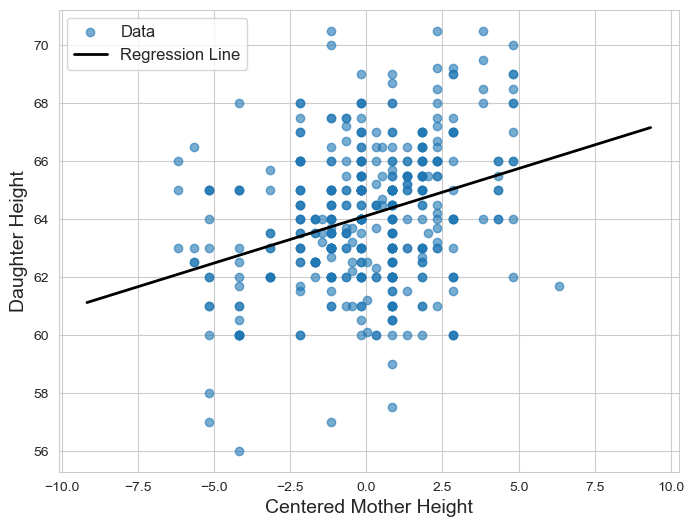

In [5]:
# Plot the line
plt.figure(figsize=(8,6))

xs = np.linspace(female.mother.min()-3,
                 female.mother.max()+3,
                 20)
line = slr_mother.predict(xs.reshape(-1,1))

plt.scatter(female.mother, female.height, alpha = .6, label = "Data")
plt.plot(xs, line,'k', linewidth = 2, label ="Regression Line")

plt.xlabel("Centered Mother Height", fontsize=14)
plt.ylabel("Daughter Height", fontsize=14)

plt.legend(fontsize=12)


plt.show()

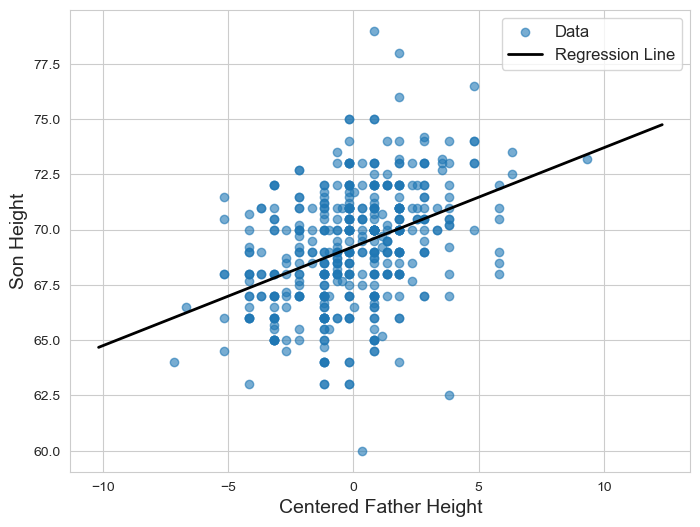

In [6]:
# Plot the line
plt.figure(figsize=(8,6))

xs = np.linspace(male.father.min()-3,
                 male.father.max()+3,
                 20)
line = slr_father.predict(xs.reshape(-1,1))

plt.scatter(male.father, male.height, alpha = .6, label = "Data")
plt.plot(xs, line,'k', linewidth = 2, label ="Regression Line")

plt.xlabel("Centered Father Height", fontsize=14)
plt.ylabel("Son Height", fontsize=14)

plt.legend(fontsize=12)


plt.show()

In [7]:
print("The estimate of beta_1_hat for the line regressing",
      "daughter height on mother height is", 
      np.round(slr_mother.coef_[0], 4))


print("The estimate of beta_1_hat for the line regressing",
      "son height on father height is", 
      np.round(slr_father.coef_[0], 4))

The estimate of beta_1_hat for the line regressing daughter height on mother height is 0.3266
The estimate of beta_1_hat for the line regressing son height on father height is 0.4477


Both estimates suggest that a child whose parent is tall is likely to be shorter than their parent, while a child whose parent is short is likely to be taller than their parent.

##### 1. b) A Paradox?

This phenomenon, where a child's height usually reverts to the population mean, would suggest that over time the population should converge to the average, right? 

What is incorrect with this line of reasoning?

##### ANSWER

It is true, based on the data we have, that predicted child height is closer to the population average height than their parent's height. However there is a difference between actual height and predicted height, a difference determined by $\epsilon$. Recall the image of the bell curves centered on the regression line. Under the assumptions of slr we could even derive an estimate of the probability that a child is taller than their tall parent or shorter than their short parent. Both of which would be nonzero.

##### 2. Estimating the standard deviation of $\epsilon$.

Recall that we assumed:

$$
y = \beta_0 + \beta_1 x + \epsilon,
$$

where $\epsilon$ is a normally distributed random variable with variance $\sigma^2$.


It is often useful for us to have an estimate of $\sigma$ because it allows us to give reasonable guesses for the possible values of $y$ for a given value of $x$.

We estimate $\sigma$ by finding the standard deviation of the <i>residuals</i>, which are the predicted values minus the actual values or:

$$
\hat{y} - y.
$$

So if we have $n$ observations we have the following estimate for $\sigma$:

$$
\hat{\sigma} = \sqrt{\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n-2}} \approx RMSE
$$

Load in this phony data, fit a simple linear regression model on it and estimate $\sigma$.

In [8]:
x = 8*np.random.random(100) - 4
y = 2*x + 3*np.random.randn(100)

In [9]:
slr = LinearRegression(copy_X=True)

slr.fit(x.reshape(-1,1), y)

LinearRegression()

In [10]:
sigma_hat = np.sqrt(np.sum(np.power(y-slr.predict(x.reshape(-1,1)),2))/(len(y)-2))

In [11]:
print("The estimate sigma_hat is",sigma_hat)
print("The actual value of sigma was", 3)

The estimate sigma_hat is 3.1538157385967662
The actual value of sigma was 3


##### 3. Simulating data using your regression estimates

We will end with one way you can use this estimate of $\sigma$.

Sometimes you may like to simulate "new observations" that follow the model you fit. This is possible using the fit   coefficient estimates and the estimate of $\sigma$. To simulate new observations we just recall the simple linear regression model:

$$
y = \beta_0 + \beta_1 x + \epsilon,
$$

which can be estimated with:

$$
\hat{y} = \hat{\beta_0} + \hat{\beta_1} x + \hat{\epsilon}, 
$$

where $\hat{\epsilon} \sim N(0,\hat{\sigma}).$

Simulate $100$ new observations of $y$ using the estimates you obtained in 2.

In [12]:
x = 8*np.random.random(100) - 4
y = slr.intercept_ + slr.coef_[0]*x + sigma_hat * np.random.randn(100)

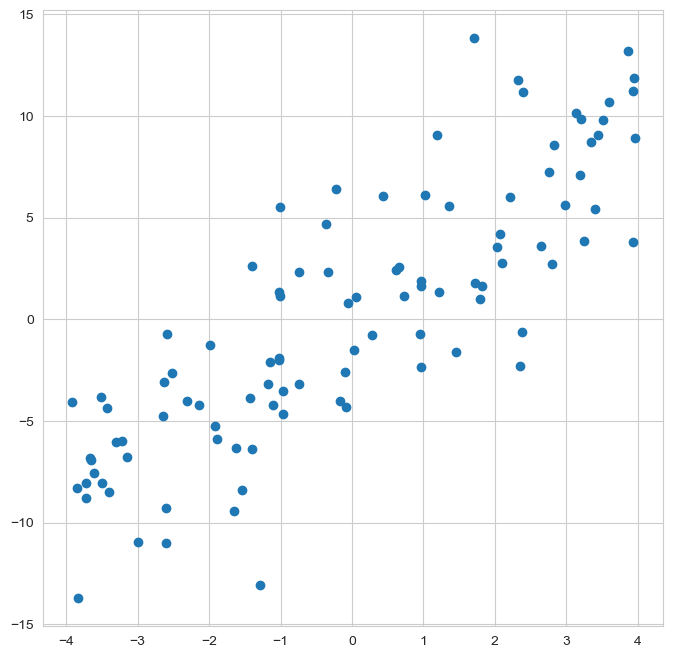

In [13]:
plt.figure(figsize=(8,8))

plt.scatter(x, y)

plt.show()

##### 4. Regressing backwards

What happens if we accidentally regress $x$ on $y$?

a. Load the data below.

In [14]:
x = np.linspace(-10,10,1000)
y = x + np.random.randn(1000)

b. First, using either `numpy` or `sklearn` perform the regression correctly, meaning regress $y$ on $x$. Look at $\hat{\beta_1}$.

In [15]:
slr = LinearRegression(copy_X = True)

slr.fit(x.reshape(-1,1), y)

slr.coef_[0]

1.0022222309293507

c. Using either `numpy` or `sklearn` regress $x$ on $y$, then look at $\hat{\beta_1}$. Notice anything?

In [16]:
slr = LinearRegression(copy_X = True)

slr.fit(y.reshape(-1,1), x)

slr.coef_[0]

0.9690711286688545

d. Now load in the new $y$ that has an $\epsilon$ term with higher variance below, and refit the regression and look at $\hat{\beta_1}$. Notice anything?

In [17]:
y = x + 2*np.random.randn(1000)

In [18]:
slr = LinearRegression(copy_X = True)

slr.fit(y.reshape(-1,1), x)

slr.coef_[0]

0.8967162410365707

e. Finish the `for` loop code that records the $\hat{\beta_1}$ for errors with increasing variance.

In [19]:
beta_1_hats = []

for c in np.linspace(.1,100,10000):
    y = x + c*np.random.randn(1000)
    
    slr = LinearRegression()
    
    # fit the slr here
    slr.fit(y.reshape(-1,1), x)
    
    # append the estimate to beta_1_hats here
    beta_1_hats.append(slr.coef_[0])

f. Plot the $\hat{\beta_1}$s as a function of `c`. What happened?

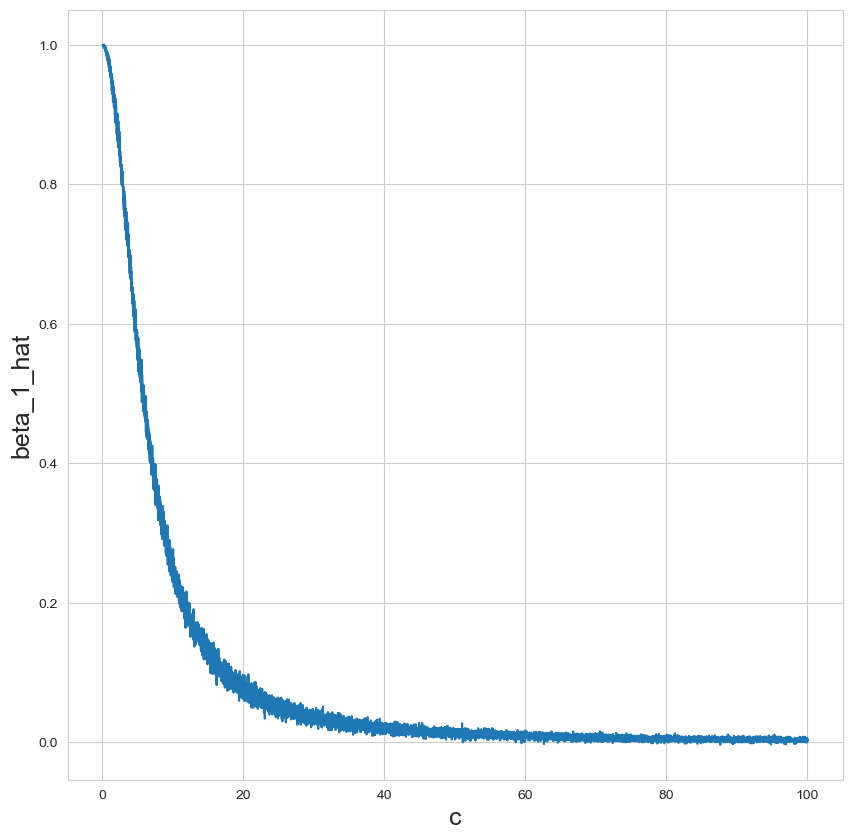

In [20]:
plt.figure(figsize=(10,10))

plt.plot(np.linspace(.1,100,10000), beta_1_hats)

plt.ylabel("beta_1_hat", fontsize=18)
plt.xlabel("c", fontsize=18)

plt.show()

$$
\hat{\beta_1} = \frac{\sum_{i=1}^n \left( x_i - \overline{x}\right)\left( y_i - \overline{y} \right)}{\sum_{i=1}^n \left(x_i - \overline{x} \right)^2} = \frac{\text{cov}(x,y)}{\text{var}(x)},
$$

f. Recall the formula for $\hat{\beta_1}$ for a regression of $y$ on $x$ given above. If we assume that $y = \beta_0 + \beta_1 x + \epsilon$ and then regress $x$ on $y$, what happens to the value of $\hat{\beta_1}$ as the variance of $\epsilon$ goes to $\infty$?

##### ANSWER

If we accidentally regress $x$ on $y$, then the estimate is given by:
$$
\hat{\beta_1} = \frac{\text{cov}(x,y)}{\text{var}(y)} = \frac{\text{cov}(x, \beta_0 + \beta_1x + \epsilon)}{\text{var}(\beta_0 + \beta_1x + \epsilon)} = \frac{\text{cov}(x,\beta_0) + \beta_1\text{cov}(x,x) + \text{cov}(x,\epsilon)}{\beta_1^2\text{var}(x) + \text{var}(\epsilon)}
$$

$$
= \frac{\beta_1\text{var}(x)}{\beta_1^2\text{var}(x) + \text{var}(\epsilon)}.
$$

Note this is because we have assumed in the set up of slr that $x$ and $\epsilon$ are independent so $\text{cov}(x,\epsilon) = 0$, $\text{cov}(x,c)$ = 0 for any random variable $x$ and any constant $c$, and $\text{cov}(\bullet,\bullet)$ is linear in both arguments.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)